In [1]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=42803, as_frame=True)

In [2]:
# print dataset description
print(dataset["DESCR"])

Data reported to the police about the circumstances of personal injury road accidents in Great Britain from 1979, and the maker and model information of vehicles involved in the respective accident.

This version includes data up to 2015.

Downloaded from openml.org.


In [4]:
# load feature matrix X
df_X = dataset["frame"]
df_X.sample(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
260358,2015440325202,1.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,6.0
267470,2015450025501,2.0,9.0,0.0,7.0,0.0,5.0,0.0,0.0,0.0,...,11.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0
285993,2015460264285,1.0,4.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0
163461,2015215001076,3.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,2.0,0.0,0.0,9.0,1.0,3.0
101795,201511NH16595,1.0,9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0


In [5]:
df_X.shape

(363243, 67)

In [7]:
import pandas as pd

# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [8]:
# display non numerical values
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [9]:
df_X["Sex_of_Driver"].unique()

array(['1.0', '2.0', '3.0'], dtype=object)

In [11]:
# correct to numerical feature ie float

df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

In [12]:
# Let's combine 'Date' and 'Time' into 'Timestamp'
df_X["Timestamp"] = pd.to_datetime(df_X["Date"] + " " + df_X["Time"])

# Let's drop 'Date' and 'Time'
df_X = df_X.drop(labels=["Date", "Time"], axis=1)

# Let's show content of 'Timestamp'
df_X["Timestamp"].head()

0   2015-12-01 18:45:00
1   2015-12-01 07:50:00
2   2015-12-01 18:08:00
3   2015-01-13 07:40:00
4   2015-09-01 07:30:00
Name: Timestamp, dtype: datetime64[ns]

In [13]:
df_X["day_of_week"] = df_X["Timestamp"].dt.day_of_week
df_X["hour_of_day"] = df_X["Timestamp"].dt.hour

In [17]:
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()
unique_values

Urban_or_Rural_Area                                 2
Sex_of_Casualty                                     2
Was_Vehicle_Left_Hand_Drive?                        2
Casualty_Class                                      3
Did_Police_Officer_Attend_Scene_of_Accident         3
                                                ...  
1st_Road_Number                                  3938
Location_Easting_OSGR                           78609
Location_Northing_OSGR                          82205
Latitude                                       116292
Longitude                                      117588
Length: 64, dtype: int64

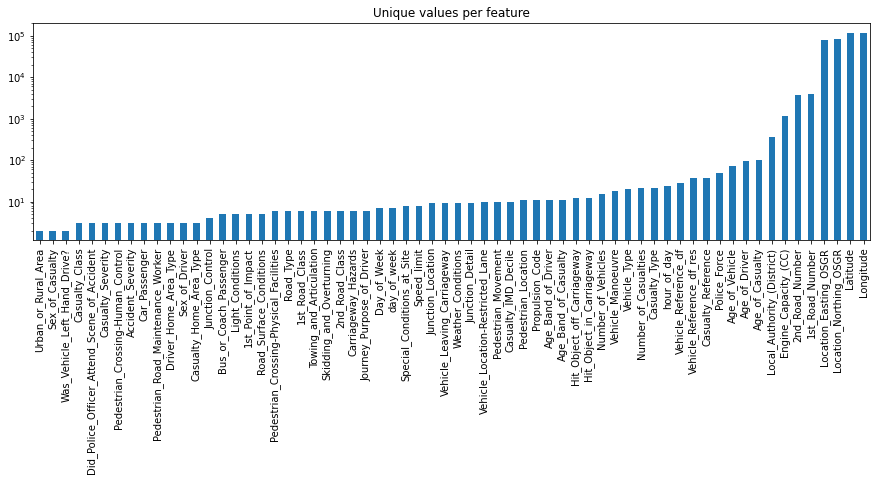

In [19]:
import numpy as np

# plot unqiue values visually
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature");

In [20]:
df_X.duplicated().sum()

0

In [23]:
# find duplicates without one column

df_X.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

22

In [25]:
is_duplicate = df_X.drop(labels=['Accident_Index'], axis=1).duplicated(keep=False)
df_X[is_duplicate].head(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Timestamp,day_of_week,hour_of_day
109183,2015132190930,1.0,9.0,0.0,18.0,0.0,6.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,9.0,NaN,NaN,2015-09-01 15:39:00,1.0,15.0
109184,2015132190930,2.0,9.0,0.0,18.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,9.0,NaN,NaN,2015-09-01 15:39:00,1.0,15.0
109201,2015132191539,1.0,9.0,0.0,18.0,0.0,6.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,9.0,NaN,NaN,2015-09-01 15:39:00,1.0,15.0
109202,2015132191539,2.0,9.0,0.0,18.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,9.0,NaN,NaN,2015-09-01 15:39:00,1.0,15.0
151844,201520S038475,1.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,1.0,2.0,2015-05-30 16:12:00,5.0,16.0


In [26]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 68)

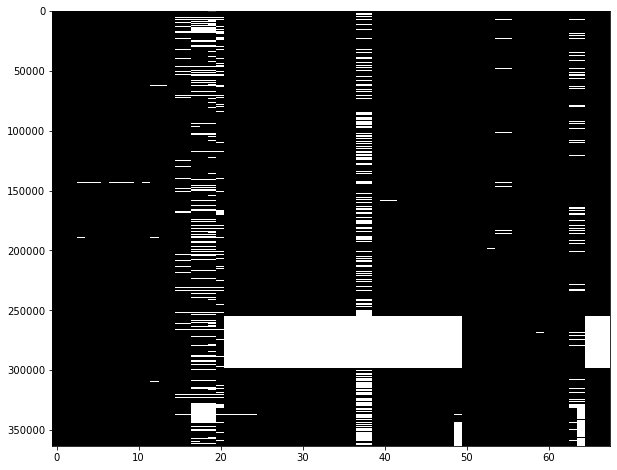

In [27]:
# visualise missing data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray");

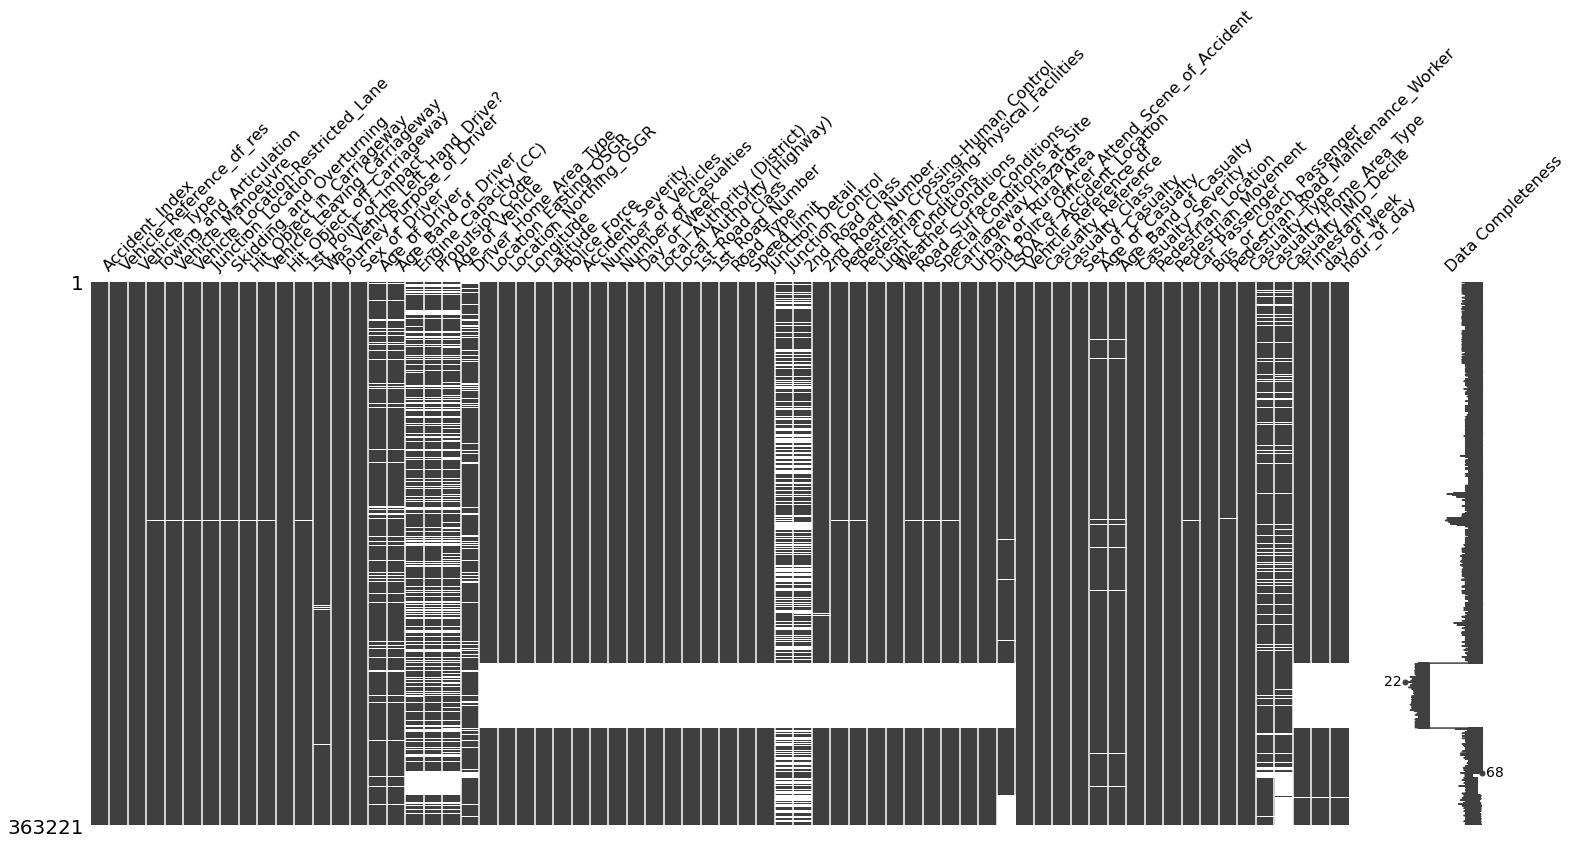

In [28]:
import missingno as msno

msno.matrix(df_X, labels=True);

In [29]:
# drop entries that have less than 75% of values

df_X = df_X.dropna(thresh=df_X.shape[1] * 0.75, axis=0)
df_X.shape

(319847, 68)

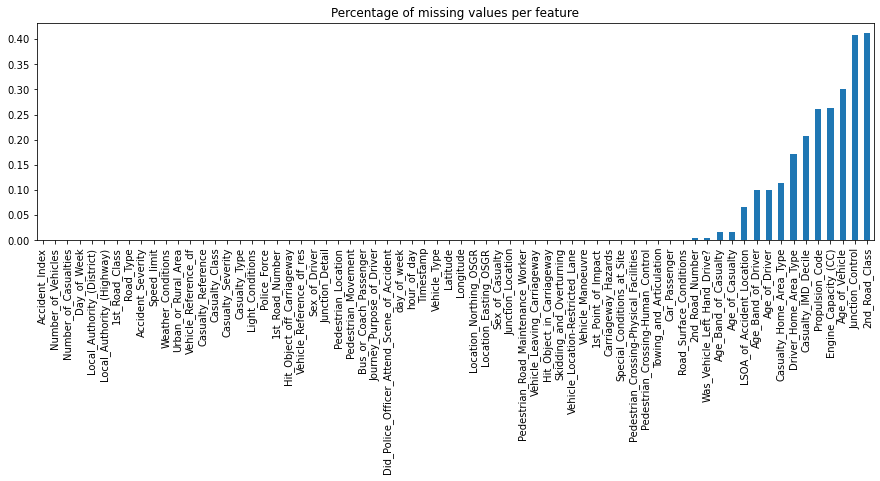

In [30]:
# visualise missing values per feature

df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

In [31]:
# remove any features with more than 15% missing

df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319847, 61)

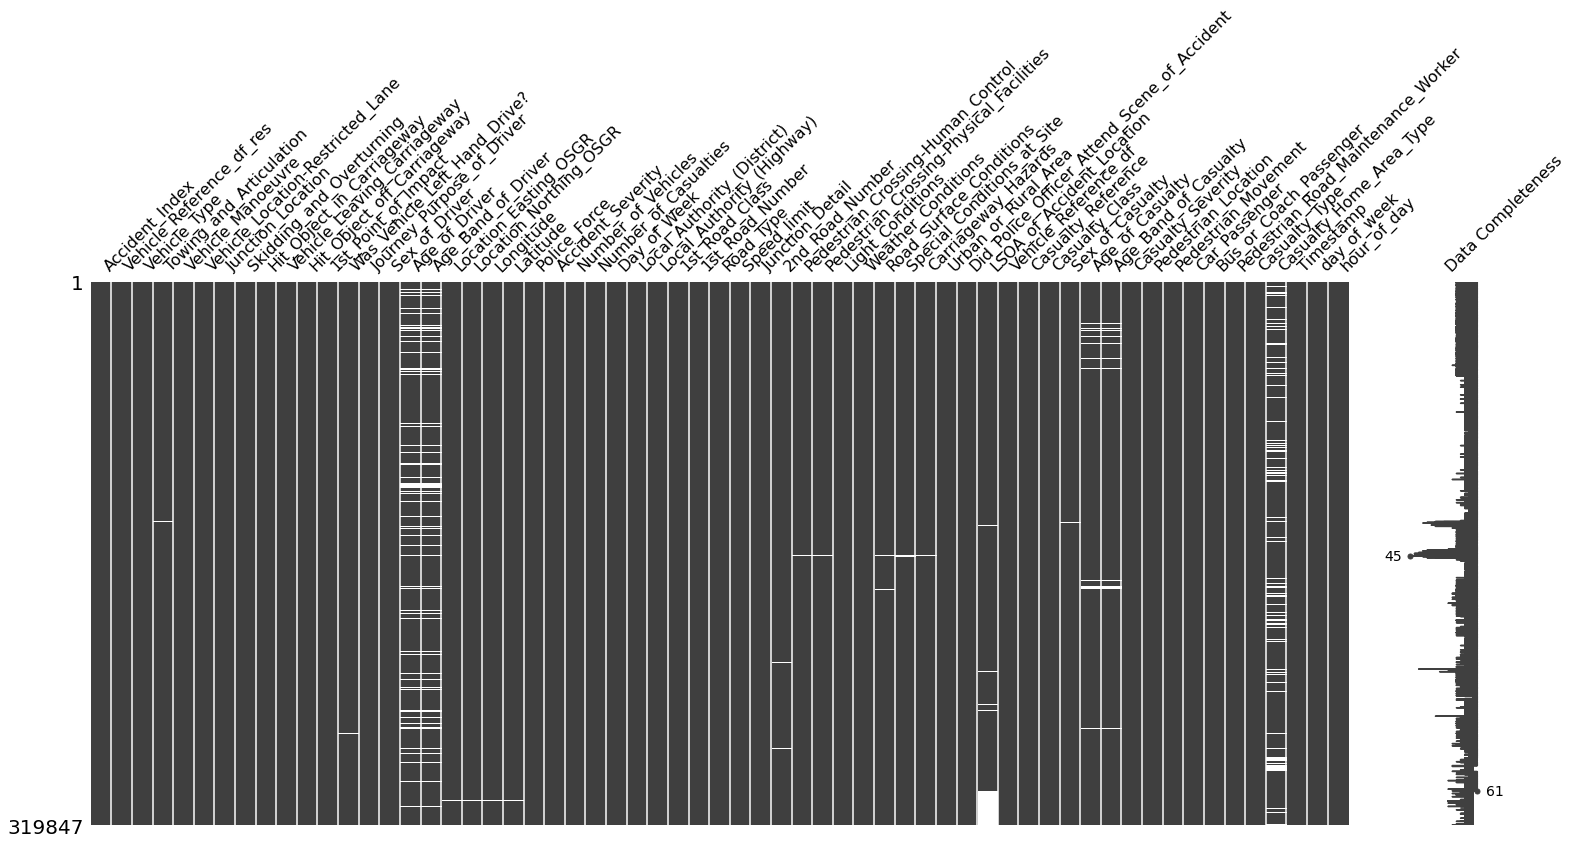

In [32]:
msno.matrix(df_X, labels=True);

In [33]:
# lw=0: lw stands for line width. 0 means that we don’t want to show any lines
marker=".": Instead of lines, we tell the plot to use . as markers for each data point
subplots=True: subplots tells pandas to plot each feature in a separate subplot
layout=(-1, 2): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
figsize=(15, 40), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

SyntaxError: invalid syntax (Temp/ipykernel_12740/2874224608.py, line 2)

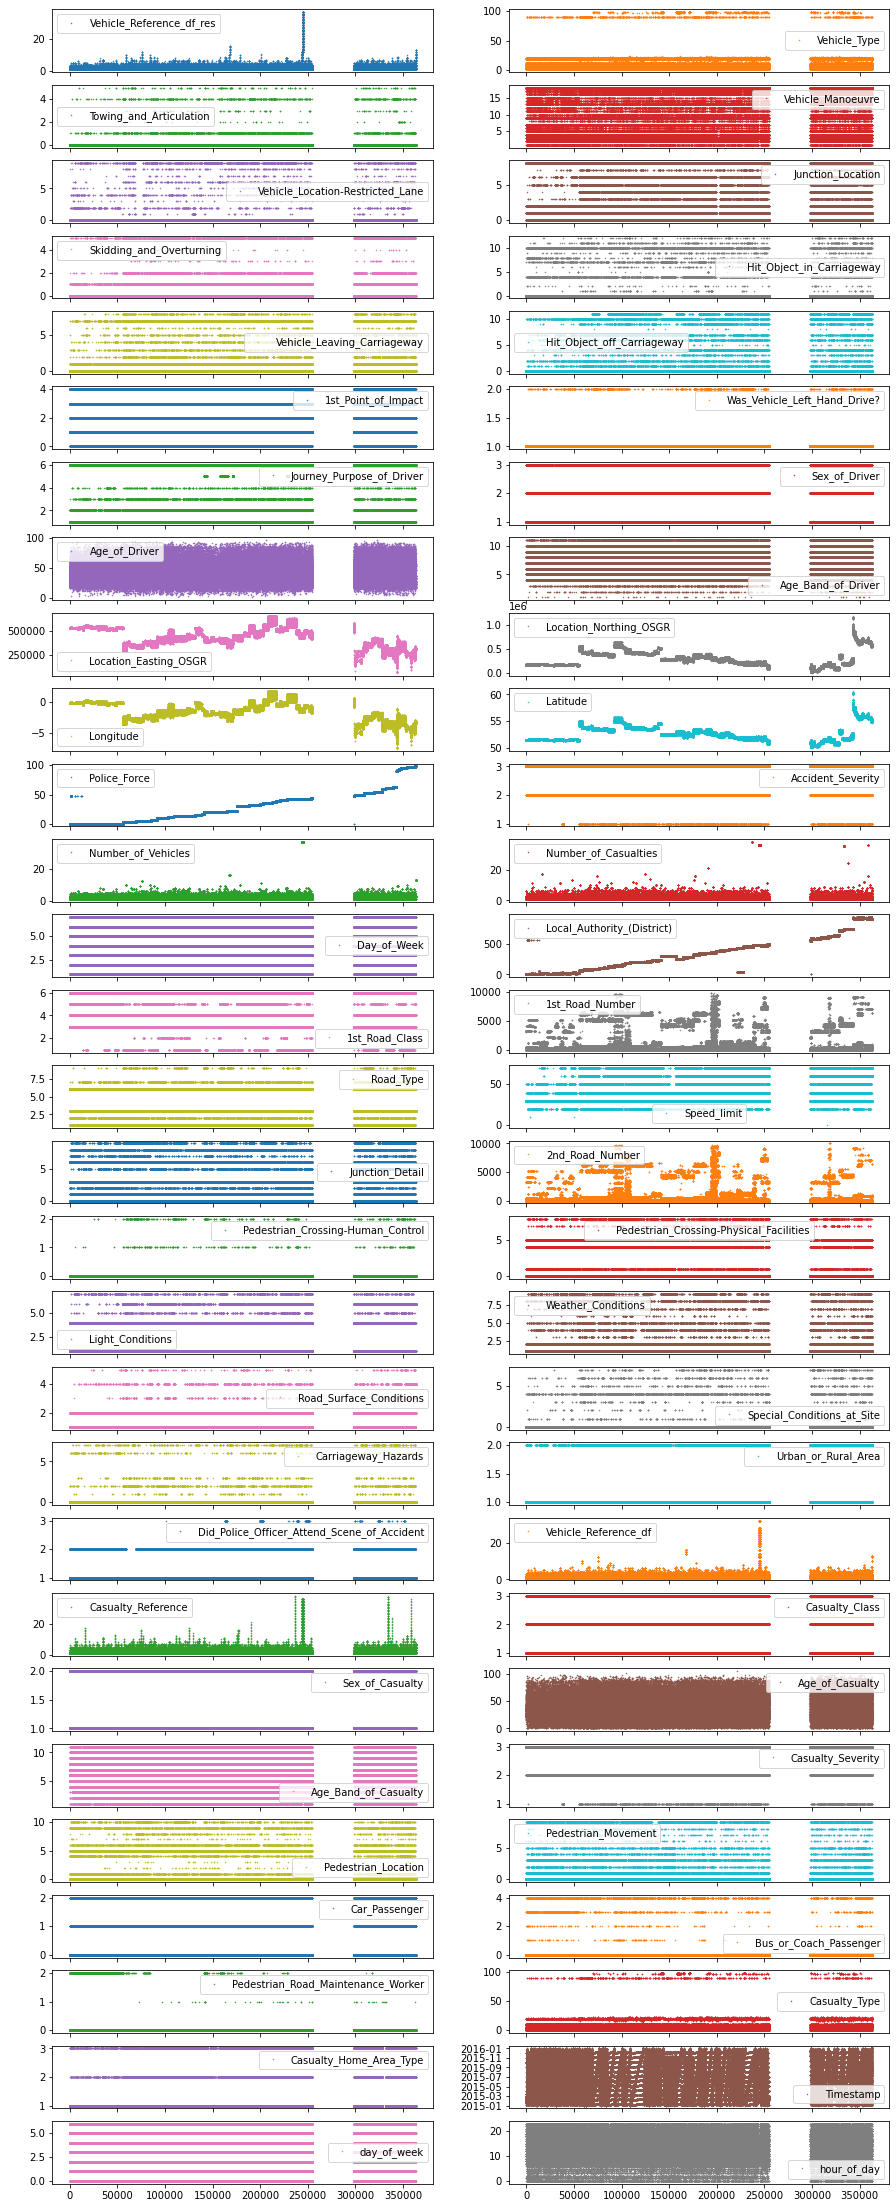

In [34]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 40), markersize=1);

In [36]:
# While this plot works well for huge number of samples, the plotting routine starts to struggle once you go beyond ~100 subplots. To tackle this, you could restrict the dataframe to plot for example to the first 50 features only, using df_X.iloc[:, :50]

In [37]:
df_X = df_X.reset_index(drop=True)

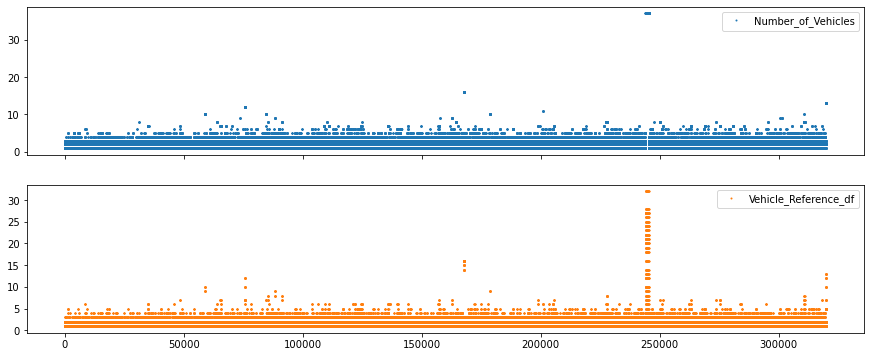

In [38]:
df_X[["Number_of_Vehicles", "Vehicle_Reference_df"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2);

In [39]:
# looking to move the one entry where single accident > 35 vehicles

# Let's create a mask which has 'True' for every sample that needs to be dropped
entries_to_drop = df_X["Number_of_Vehicles"].gt(30)
print(entries_to_drop.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df_X = df_X[~entries_to_drop]

1332


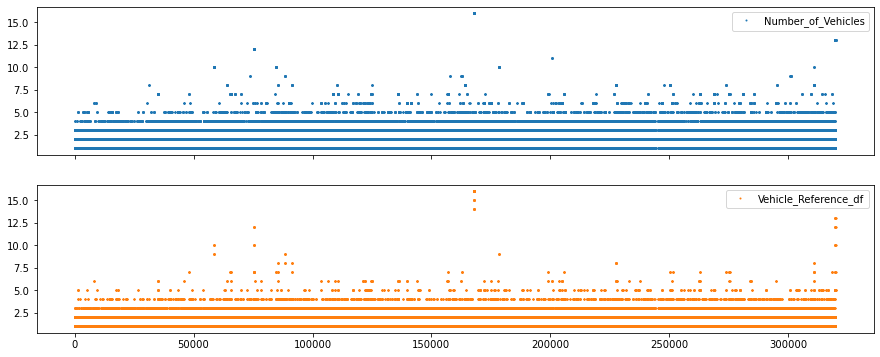

In [41]:
# verify by plotting again

df_X[["Number_of_Vehicles", "Vehicle_Reference_df"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2);

In [42]:
# subplot only pulls numerical data

#  Extract number of features of type 'number' or 'datetime'
df_X.select_dtypes(include=["number", "datetime"]).shape

(318515, 58)

In [44]:
# identify non numerical

df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])
df_non_numerical.head()

,Accident_Index,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,E09000020,E01002825
1,201501BS70002,E09000020,E01002820
2,201501BS70004,E09000020,E01002833
3,201501BS70005,E09000020,E01002874
4,201501BS70008,E09000020,E01002814


In [45]:
# Extract number of unique values per non-numerical feature
df_non_numerical.nunique()

Accident_Index               123667
Local_Authority_(Highway)       204
LSOA_of_Accident_Location     25979
dtype: int64

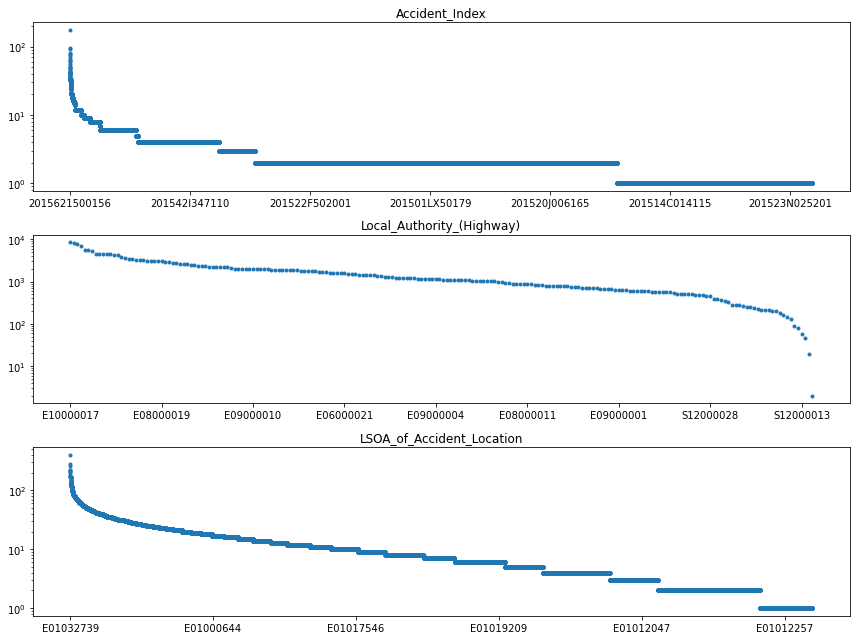

In [46]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 9))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout()

In [47]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index
accident_ids

Index(['2015621500156', '201597AC70404', '2015984141415', '201522D501706',
       '201501RY10259', '201542I309809', '2015160C06511', '2015300013662',
       '20154100T3095', '2015521501170'],
      dtype='object')

In [48]:
# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317659, 61)